# Problem 1: Data with R

In [12]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [13]:
%%R

library(tidyverse)

In [14]:
%%R


# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Parsed with column specification:
cols(
  X = col_double(),
  label = col_integer()
)

  warnings.warn(x, RRuntimeWarning)


In [26]:
%%R 

dat

# A tibble: 1,000 x 2
        X label
    <dbl> <int>
 1 2.46       0
 2 1.55       0
 3 5.51       0
 4 0.119      0
 5 7.51       0
 6 0.800      0
 7 1.91       0
 8 1.21       0
 9 2.86       0
10 0.0948     0
# ... with 990 more rows


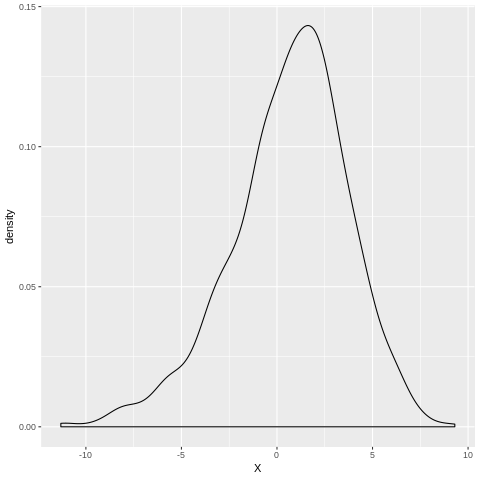

In [48]:
%%R

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: don't forget to make sure the labels are factors!

data <- dat %>% 
    mutate(label = parse_factor(label, NULL))

data %>%
    group_by(label) %>% 
    ggplot(aes(x = X)) + geom_density()




# Problem 2: Using Classes in Python

In [ ]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!
        X should be a list of data points
        y should be a list of labels
        """

        self.X = random.shuffle(X)
        self.y = y
        return self
    
    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [64]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]


In [65]:
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [66]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)



In [67]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

AssertionError: 

## Problem 2.2: Splitting!

In [62]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data

train = dat[:699]
test = dat[700:]

print(len(train))
pritn(len(test))

In [ ]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.

a=[]
n=int(input(len(train)))
for i in range(1,n+1):
    b=int(input(len(train)))
    a.append(b)
even=[]
odd=[]
for j in a:
    if(j%2==0):
            train_X = even.append(j)
    else:
            train_Y = odd.append(j)
        
print("The even list -- which are the X's",even)
print("The odd list -- which are the Y's",odd)





In [ ]:
a=[]
n=int(input(len(test)))
for i in range(1,n+1):
    b=int(input(len(test)))
    a.append(b)
even=[]
odd=[]
for j in a:
    if(j%2==0):
           test_X = even.append(j)
    else:
            test_Y = odd.append(j)
        
print("The even list",even)
print("The odd list",odd)
 


## Problem 2.3: Testing models!

In [124]:
# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
# 2. Train the instance on the "train" groups X's and labels (y's)
# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
#    B. Use your "test" labels to see if the predicted label is equal the true label
class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K
        
    def fit(self, train_X, train_Y, test_X, test_Y):
        self.train_X = train_X
        self.train_Y = train_Y 
        self.test_X = test_X 
        self.test_Y = test_Y 
        
        def predict(self, train_X, train_Y, test_X, test_Y):    
        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(train_X,test_X)])))
                 for test_X in self.train_X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.test_Y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(train_X, train_Y, test_X, test_Y)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, train_X, train_Y, test_X, test_Y):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, train_X, train_Y, test_X, test_Y):
        avg = sum(train_X, train_Y, test_X, test_Y[-self.K:])/self.K
        return round(1 - avg)
 
    

In [ ]:
# Compare the two classes of models!
KNearestNeighbors(5)

In [ ]:
KFurthestNeighbors(5)